In [1]:
# import the dataset from Sklearn

from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import xgboost as xgb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 

In [2]:
max_display=13

# Loading the data

In [3]:
target = load_boston().target
# re to real
target = np.multiply(target, 1000)
target = target.astype(int)
target

array([24000, 21600, 34700, 33400, 36200, 28700, 22900, 27100, 16500,
       18900, 15000, 18900, 21700, 20400, 18200, 19900, 23100, 17500,
       20200, 18200, 13600, 19600, 15200, 14500, 15600, 13900, 16600,
       14800, 18400, 21000, 12700, 14500, 13200, 13100, 13500, 18900,
       20000, 21000, 24700, 30800, 34900, 26600, 25300, 24700, 21200,
       19300, 20000, 16600, 14400, 19400, 19700, 20500, 25000, 23400,
       18900, 35400, 24700, 31600, 23300, 19600, 18700, 16000, 22200,
       25000, 33000, 23500, 19400, 22000, 17400, 20900, 24200, 21700,
       22800, 23400, 24100, 21400, 20000, 20800, 21200, 20300, 28000,
       23900, 24800, 22900, 23900, 26600, 22500, 22200, 23600, 28700,
       22600, 22000, 22900, 25000, 20600, 28400, 21400, 38700, 43800,
       33200, 27500, 26500, 18600, 19300, 20100, 19500, 19500, 20400,
       19800, 19400, 21700, 22800, 18800, 18700, 18500, 18300, 21200,
       19200, 20400, 19300, 22000, 20300, 20500, 17300, 18800, 21400,
       15700, 16200,

In [4]:
# Read the Data

df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#rename columns so they are understandable

df = df.rename(columns={"CRIM": "per capita crime rate by town", "ZN": "proportion of residential land big", 
                   "INDUS": "proportion of non-retail business", "CHAS": "next to river", 
                   "NOX": "nitric oxides concentration", "RM": "average number of rooms", 
                   "AGE": "proportion of owner-occupied long time", "DIS": "distances to five Boston employment centres", 
                   "RAD": "accessibility to radial highways", "TAX": "full-value property-tax rate", 
                   "PTRATIO": "pupil-teacher ratio by town", "B": "proportion of blacks per town", 
                   "LSTAT": "percentage lower status of population"})

# Transforming tha data

In [6]:
X = df
X

,per capita crime rate by town,proportion of residential land big,proportion of non-retail business,next to river,nitric oxides concentration,average number of rooms,proportion of owner-occupied long time,distances to five Boston employment centres,accessibility to radial highways,full-value property-tax rate,pupil-teacher ratio by town,proportion of blacks per town,percentage lower status of population
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


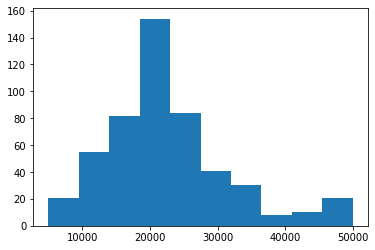

In [7]:
plt.figure()
plt.hist(target)

plt.show()

In [8]:
print(np.quantile(target, 0.2))
print(np.quantile(target, 0.75))
print(np.quantile(target, 0.9))

15300.0
25000.0
34800.0


In [9]:
target[target <= 30000] = 0
#target[target <= 15.3] = 0
#target = np.where((target <= 25.0) & (target >= 15.3), 1, target)
#target = np.where((target <= 34.8) & (target >= 25.0), 2, target)
#target[target >= 34.8] = 3
target[target > 30000] = 1
target

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
"""#set them as categorical
X[['cut','color','clarity']] = X[['cut','color','clarity']].astype('category')

# get the maps to the encoding
cut_cat_map = [x for x in zip(X.cut.cat.categories,X.cut.cat.codes.unique() )]
color_cat_map = [x for x in zip(X.color.cat.categories,X.cut.cat.codes.unique() )]
clarity_cat_map = [x for x in zip(X.clarity.cat.categories,X.cut.cat.codes.unique() )]

# replace categorical classes to their encoding
X[['cut','color','clarity']] = X[['cut','color','clarity']].apply(lambda c : c.cat.codes)

print('cut_cat_map:' , cut_cat_map)
print('color_cat_map: ',color_cat_map)
print('clarity_cat_map: ', clarity_cat_map)
"""

"#set them as categorical\nX[['cut','color','clarity']] = X[['cut','color','clarity']].astype('category')\n\n# get the maps to the encoding\ncut_cat_map = [x for x in zip(X.cut.cat.categories,X.cut.cat.codes.unique() )]\ncolor_cat_map = [x for x in zip(X.color.cat.categories,X.cut.cat.codes.unique() )]\nclarity_cat_map = [x for x in zip(X.clarity.cat.categories,X.cut.cat.codes.unique() )]\n\n# replace categorical classes to their encoding\nX[['cut','color','clarity']] = X[['cut','color','clarity']].apply(lambda c : c.cat.codes)\n\nprint('cut_cat_map:' , cut_cat_map)\nprint('color_cat_map: ',color_cat_map)\nprint('clarity_cat_map: ', clarity_cat_map)\n"

# Building and training the model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)  # create train and test

In [12]:
y_train_ohe = to_categorical(y_train, num_classes=4)
y_test_ohe = to_categorical(y_test, num_classes=4)

In [13]:
# build model - Xgboost

xgb_mod = xgb.XGBClassifier(random_state=42, gpu_id=0)  # build classifier
xgb_mod = xgb_mod.fit(X_train, y_train)

[11:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [14]:
# make prediction and check model accuracy

y_pred = xgb_mod.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [15]:
# Performance

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.39%


In [16]:
# Generate the Tree explainer and SHAP values

explainer = shap.Explainer(xgb_mod, X_train)
shap_values = explainer(X)
expected_value = explainer.expected_value

In [17]:
shap_values

.values =
array([[-1.21443152, -0.01129523,  1.43875825, ...,  0.95449757,
         0.46242396,  2.0050212 ],
       [-0.50348012, -0.02931046, -0.33997386, ..., -0.25206745,
         0.20485119, -0.62810343],
       [-0.59608708, -0.05228354, -0.26149168, ...,  0.12881585,
         0.294972  ,  3.90226529],
       ...,
       [-0.77781866, -0.0646335 , -0.34438464, ..., -0.95191973,
         0.24011999,  1.20491073],
       [-0.4759634 , -0.0656423 , -0.51608251, ..., -0.9608227 ,
         0.25018563,  0.90399775],
       [-0.70320984, -0.03466502, -0.31144102, ..., -0.53708816,
         0.19506298,  1.10623003]])

.base_values =
array([-4.68021919, -4.68021919, -4.68021919, -4.68021919, -4.68021919,
       -4.68021919, -4.68021919, -4.68021919, -4.68021919, -4.68021919,
       -4.68021919, -4.68021919, -4.68021919, -4.68021919, -4.68021919,
       -4.68021919, -4.68021919, -4.68021919, -4.68021919, -4.68021919,
       -4.68021919, -4.68021919, -4.68021919, -4.68021919, -4.68021919,
 

In [18]:
shap_values.values[1]

array([-0.50348012, -0.02931046, -0.33997386, -0.01459024,  0.16207803,
       -1.21686059, -0.16454651, -0.47801176, -0.26881974,  1.02669824,
       -0.25206745,  0.20485119, -0.62810343])

In [19]:
shap_values.values

array([[-1.21443152, -0.01129523,  1.43875825, ...,  0.95449757,
         0.46242396,  2.0050212 ],
       [-0.50348012, -0.02931046, -0.33997386, ..., -0.25206745,
         0.20485119, -0.62810343],
       [-0.59608708, -0.05228354, -0.26149168, ...,  0.12881585,
         0.294972  ,  3.90226529],
       ...,
       [-0.77781866, -0.0646335 , -0.34438464, ..., -0.95191973,
         0.24011999,  1.20491073],
       [-0.4759634 , -0.0656423 , -0.51608251, ..., -0.9608227 ,
         0.25018563,  0.90399775],
       [-0.70320984, -0.03466502, -0.31144102, ..., -0.53708816,
         0.19506298,  1.10623003]])

# Visualizations

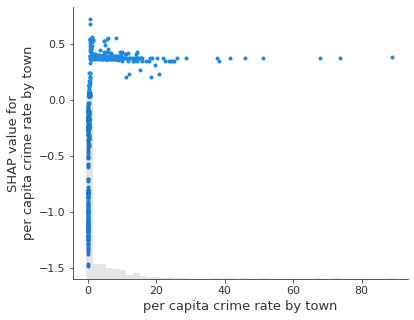

In [20]:
shap.plots.scatter(shap_values[:,0])

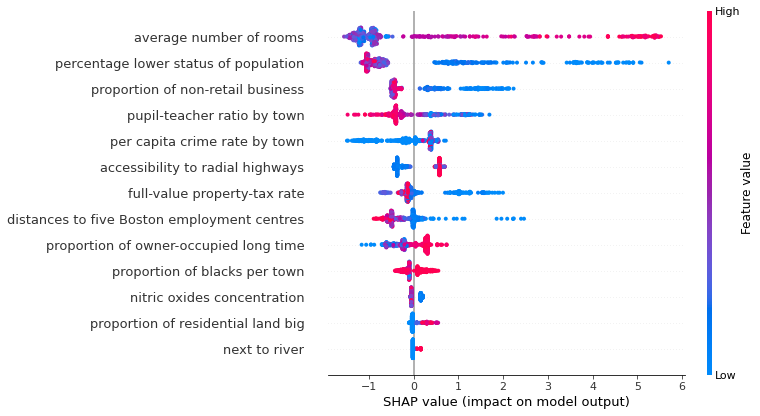

In [22]:
# Generate summary dot plot
shap.summary_plot(shap_values, X, title="SHAP summary plot")

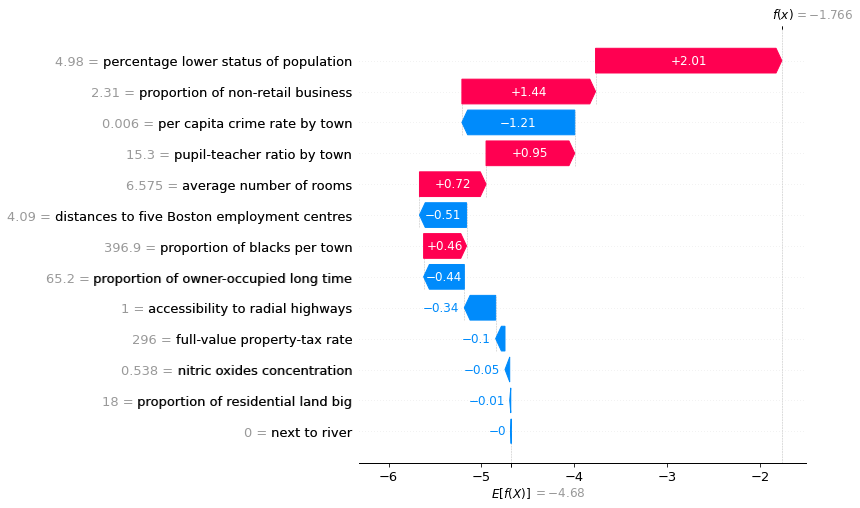

In [23]:
# Generate waterfall plot
shap.plots.waterfall(shap_values[0], max_display=20)

In [24]:
# Generate dependence plot
shap.dependence_plot("worst concave points", shap_values[0], X, interaction_index="LSTAT")

TypeError: order must be str, not int

In [ ]:
# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values, X)
shap.dependence_plot("worst concave points", shap_values, X, interaction_index="mean concave points")

In [ ]:
# Generate force plot - Multiple rows
shap.force_plot(explainer.expected_value, shap_values[:10, :], X.iloc[:10, :])

In [ ]:
# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

In [ ]:
# Generate Decision plot
shap.decision_plot(expected_value, shap_values[79], link='logit', features=X.loc[79, :],
                   feature_names=(X.columns.tolist()), show=True, title="Decision Plot")